In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import pandas as pd


train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Separate features (pixel values) and labels
X_train = train_data.iloc[:, 1:].values  # All columns except the first (pixels)
y_train = train_data.iloc[:, 0].values   # First column is the label

X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalize pixel values (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to (num_samples, 28, 28, 1) since CNNs expect 4D input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


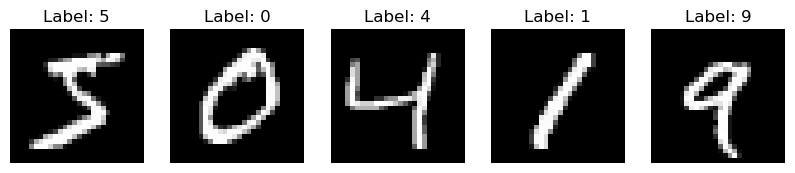

In [15]:
import matplotlib.pyplot as plt

# Plot first 5 images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')  # remove single dimension
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


In [5]:
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])


C:\Users\lsrin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
Epochs=int(input("Enter no of Epochs you need to complie your model:"))

Enter no of Epochs you need to complie your model: 5


In [7]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=Epochs, validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.9040 - loss: 0.3220 - val_accuracy: 0.9846 - val_loss: 0.0449
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9857 - loss: 0.0479 - val_accuracy: 0.9887 - val_loss: 0.0373
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9903 - loss: 0.0316 - val_accuracy: 0.9899 - val_loss: 0.0316
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9927 - loss: 0.0233 - val_accuracy: 0.9889 - val_loss: 0.0353
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9941 - loss: 0.0170 - val_accuracy: 0.9898 - val_loss: 0.0341


In [11]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9872 - loss: 0.0424
Test Accuracy: 0.9898


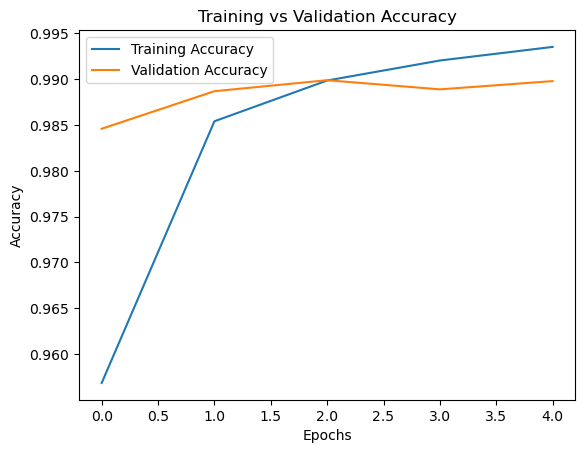

In [13]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()